In [11]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install scipy

In [12]:
%matplotlib inline

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Data Preparation

## 1.1 Load the Dataset

In [16]:
# Loading the dataset from the CSV file 
with open ('data/Customer Service_Requests_from_2010_to_Present.csv') as f:
    try:
        df = pd.read_csv(f, low_memory=False) #Error Solved with low_memory = False arguement
        print("Data Loaded Successfully")
    except pd.errors.ParserError as e:
        print("Error parsing CSV:", e)
    except FileNotFoundError as e:
        print("File not found:", e)
    except Exception as e:
        print("An error occurred:", e)


Data Loaded Successfully


## 1.2 Information of the Dataset

In [18]:
# Inspect the shape of the DataFrame (Rows, Cols)
df.shape

(300698, 53)

In [19]:
# Shows basic details about the DataFrame including number of non-null values and Data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      300698 non-null  int64  
 1   Created Date                    300698 non-null  object 
 2   Closed Date                     298534 non-null  object 
 3   Agency                          300698 non-null  object 
 4   Agency Name                     300698 non-null  object 
 5   Complaint Type                  300698 non-null  object 
 6   Descriptor                      294784 non-null  object 
 7   Location Type                   300567 non-null  object 
 8   Incident Zip                    298083 non-null  float64
 9   Incident Address                256288 non-null  object 
 10  Street Name                     256288 non-null  object 
 11  Cross Street 1                  251419 non-null  object 
 12  Cross Street 2  

##  1.3 Preview the data

In [21]:

# First Five rows
df.head()


,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [22]:

# Previewing the last 5 records from the tail 
df.tail()


,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
300693,30281872,03/29/2015 12:33:41 AM,NaN,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,NaN,CRESCENT AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
300694,30281230,03/29/2015 12:33:28 AM,03/29/2015 02:33:59 AM,NYPD,New York City Police Department,Blocked Driveway,Partial Access,Street/Sidewalk,11418.0,100-17 87 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.694077,-73.846087,"(40.69407728322387, -73.8460866160573)"
300695,30283424,03/29/2015 12:33:03 AM,03/29/2015 03:40:20 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11206.0,162 THROOP AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.699590,-73.944234,"(40.69959035300927, -73.94423377144169)"
300696,30280004,03/29/2015 12:33:02 AM,03/29/2015 04:38:35 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10461.0,3151 EAST TREMONT AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.837708,-73.834587,"(40.8377075854206, -73.83458731019586)"
300697,30281825,03/29/2015 12:33:01 AM,03/29/2015 04:41:50 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Store/Commercial,10036.0,251 WEST 48 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.760583,-73.985922,"(40.76058322950115, -73.98592204392392)"


In [23]:

# Previewing Random sample of 5 rows
df.sample(5) 


,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
24008,32155306,12-07-15 11:09,12-07-15 13:37,NYPD,New York City Police Department,Blocked Driveway,Partial Access,Street/Sidewalk,11212.0,258 LEGION STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.662368,-73.916684,"(40.66236829485997, -73.9166838782501)"
129837,31426870,08/31/2015 02:07:41 PM,08/31/2015 03:12:51 PM,NYPD,New York City Police Department,Animal Abuse,Other (complaint details),Street/Sidewalk,10016.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.752197,-73.981824,"(40.7521974591802, -73.9818236763463)"
210753,30899511,06/21/2015 04:14:13 PM,06/21/2015 05:28:24 PM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Store/Commercial,10027.0,163 WEST 125 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.808643,-73.947524,"(40.808643408447836, -73.94752355089393)"
116463,31520483,09-12-15 8:48,09-12-15 9:43,NYPD,New York City Police Department,Illegal Parking,Detached Trailer,Street/Sidewalk,10302.0,323 NICHOLAS AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.631896,-74.141978,"(40.63189586020167, -74.14197808654993)"
125333,31461894,09-04-15 23:09,09-05-15 2:07,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Music,Street/Sidewalk,10460.0,1125 WYATT STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.839210,-73.876983,"(40.83920980381351, -73.87698306368515)"


### 1.4 Convert the Columns "Created Date" and "Closed Date" to Datetime Datatype

In [25]:
def convert_to_datetime_type(date):
    # Convert the string to datetime, and coerce errors to NaT
    return pd.to_datetime(date, errors='coerce', format="mixed")

In [26]:
# converting Created Date to Datetime Datatype
df['Created Date'] = convert_to_datetime_type(df['Created Date'])

# print first 10 records
df['Created Date'].head(10)

0   2015-12-31 23:59:45
1   2015-12-31 23:59:44
2   2015-12-31 23:59:29
3   2015-12-31 23:57:46
4   2015-12-31 23:56:58
5   2015-12-31 23:56:30
6   2015-12-31 23:55:32
7   2015-12-31 23:54:05
8   2015-12-31 23:53:58
9   2015-12-31 23:53:58
Name: Created Date, dtype: datetime64[ns]

In [27]:
# converting Closed Date to Datetime Datatype
df['Closed Date'] = convert_to_datetime_type(df['Closed Date'])

# print first 10 records
df['Closed Date'].head(10)

0   2016-01-01 00:55:00
1   2016-01-01 01:26:00
2   2016-01-01 04:51:00
3   2016-01-01 07:43:00
4   2016-01-01 03:24:00
5   2016-01-01 01:50:00
6   2016-01-01 01:53:00
7   2016-01-01 01:42:00
8   2016-01-01 08:27:00
9   2016-01-01 01:17:00
Name: Closed Date, dtype: datetime64[ns]

### 1.5 Create a New Column "Request_Closing_Time" as the Time Elapsed Between Request Creation and Request Closing

In [29]:
# Create a new column for the time elapsed between Request creation and closing
df['Request Closing Time'] = (df['Closed Date'] - df['Created Date']).dt.total_seconds()/3600

#  A new Column is created which stores the Time Elapsed Between Request Creation and Request Closing in hours

# print first 10 records
df['Request Closing Time'].head(10)

0    0.920833
1    1.437778
2    4.858611
3    7.753889
4    3.450556
5    1.891667
6    1.957778
7    1.798611
8    8.550556
9    1.383889
Name: Request Closing Time, dtype: float64

## 1.6 Dropping Irrelevant Columns

In [31]:
# Creating a list of columns to drop
columns_to_drop = ['Agency Name','Incident Address','Street Name','Cross Street 1','Cross Street 2',
                   'Intersection Street 1', 'Intersection Street 2','Address Type','Park Facility Name',
                   'Park Borough','School Name', 'School Number','School Region','School Code',
                   'School Phone Number','School Address','School City','School State','School Zip',
                   'School Not Found','School or Citywide Complaint','Vehicle Type','Taxi Company Borough',
                   'Taxi Pick Up Location','Bridge Highway Name','Bridge Highway Direction','Road Ramp',
                   'Bridge Highway Segment','Garage Lot Name','Ferry Direction','Ferry Terminal Name',
                   'Landmark','X Coordinate (State Plane)','Y Coordinate (State Plane)','Due Date',
                   'Resolution Action Updated Date','Community Board','Facility Type','Location']


# Drops the columns 
df_cleaned = df.drop(columns=columns_to_drop)

In [32]:
# Inspecting if the column are dropped
df_cleaned.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Complaint Type',
       'Descriptor', 'Location Type', 'Incident Zip', 'City', 'Status',
       'Resolution Description', 'Borough', 'Latitude', 'Longitude',
       'Request Closing Time'],
      dtype='object')

### 1.7 Python Program to Remove the NaN Missing Values from Updated Dataframe.

In [34]:
# Null Value Check in Updated DataFrame
df_cleaned.isnull().sum().reset_index(name='Missing Values').rename(columns={'index': 'Column Name'})


,Column Name,Missing Values
0,Unique Key,0
1,Created Date,0
2,Closed Date,2164
3,Agency,0
4,Complaint Type,0
5,Descriptor,5914
6,Location Type,131
7,Incident Zip,2615
8,City,2614
9,Status,0


In [35]:
# Removing All the Null Values from the DataFrame
df_cleaned.dropna(inplace=True)

In [36]:
# Inspecting if the Null Values are Gone
df_cleaned.isnull().sum().reset_index(name='Missing Values').rename(columns={'index': 'Column Name'})

,Column Name,Missing Values
0,Unique Key,0
1,Created Date,0
2,Closed Date,0
3,Agency,0
4,Complaint Type,0
5,Descriptor,0
6,Location Type,0
7,Incident Zip,0
8,City,0
9,Status,0


### 1.8 Python Program to See the Unique Values From All the Columns in the DataFrame.

In [38]:
# Unique values from all columns in the DataFrame
for column in df_cleaned.columns:
    unique_vals = df_cleaned[column].unique()
    print(f"Column: {column}\n")
    print(f"Unique Values ({len(unique_vals)}): {unique_vals}\n")  
    print("-" * 50)

Column: Unique Key

Unique Values (291107): [32310363 32309934 32309159 ... 30283424 30280004 30281825]

--------------------------------------------------
Column: Created Date

Unique Values (251970): <DatetimeArray>
['2015-12-31 23:59:45', '2015-12-31 23:59:44', '2015-12-31 23:59:29',
 '2015-12-31 23:57:46', '2015-12-31 23:56:58', '2015-12-31 23:56:30',
 '2015-12-31 23:55:32', '2015-12-31 23:54:05', '2015-12-31 23:53:58',
 '2015-12-31 23:52:58',
 ...
 '2015-03-29 00:42:48', '2015-03-29 00:37:15', '2015-03-29 00:35:28',
 '2015-03-29 00:35:23', '2015-03-29 00:35:04', '2015-03-29 00:34:32',
 '2015-03-29 00:33:28', '2015-03-29 00:33:03', '2015-03-29 00:33:02',
 '2015-03-29 00:33:01']
Length: 251970, dtype: datetime64[ns]

--------------------------------------------------
Column: Closed Date

Unique Values (231991): <DatetimeArray>
['2016-01-01 00:55:00', '2016-01-01 01:26:00', '2016-01-01 04:51:00',
 '2016-01-01 07:43:00', '2016-01-01 03:24:00', '2016-01-01 01:50:00',
 '2016-01-01 01:53

# 2. Data Analysis

### 2.1 Python Program to Show Summary Statistics of Sum, Mean, Standard Deviation, Skewness, and Kurtosis of the Data Frame.

In [41]:
# Selecting only numeric columns 
numeric_cols = df_cleaned.select_dtypes(include=[np.number]).drop(columns=['Unique Key'])

In [42]:
# Calculating Sum, Mean, Standard Deviation, Skewness, and Kurtosis of the Data Frame.
summary_stats = pd.DataFrame({
    'Sum': numeric_cols.sum(),
    'Mean': numeric_cols.mean(),
    'Standard Deviation': numeric_cols.std(),
    'Skewness': numeric_cols.skew(),
    'Kurtosis': numeric_cols.kurt()
})

summary_stats

,Sum,Mean,Standard Deviation,Skewness,Kurtosis
Incident Zip,3.160833e+09,10857.977349,580.280774,-2.553956,37.827777
Latitude,1.185553e+07,40.725681,0.082411,0.123114,-0.734818
Longitude,-2.152010e+07,-73.925035,0.078654,-0.312739,1.455600
Request Closing Time,1.254358e+06,4.308926,6.062641,14.299525,849.777081


### 2.2 Python Program to Calculate And Show Correlation of All Variables.

In [44]:
# calculate the correlation between the variables using corr() function 
correlation_matrix = numeric_cols.corr()

correlation_matrix

,Incident Zip,Latitude,Longitude,Request Closing Time
Incident Zip,1.000000,-0.499081,0.385934,0.057182
Latitude,-0.499081,1.000000,0.368819,0.024497
Longitude,0.385934,0.368819,1.000000,0.109724
Request Closing Time,0.057182,0.024497,0.109724,1.000000


# 3. Data Exploration

### 3.1 Four Major Insights through Visualization

#### Insight 1: Top 10 complaint types by count

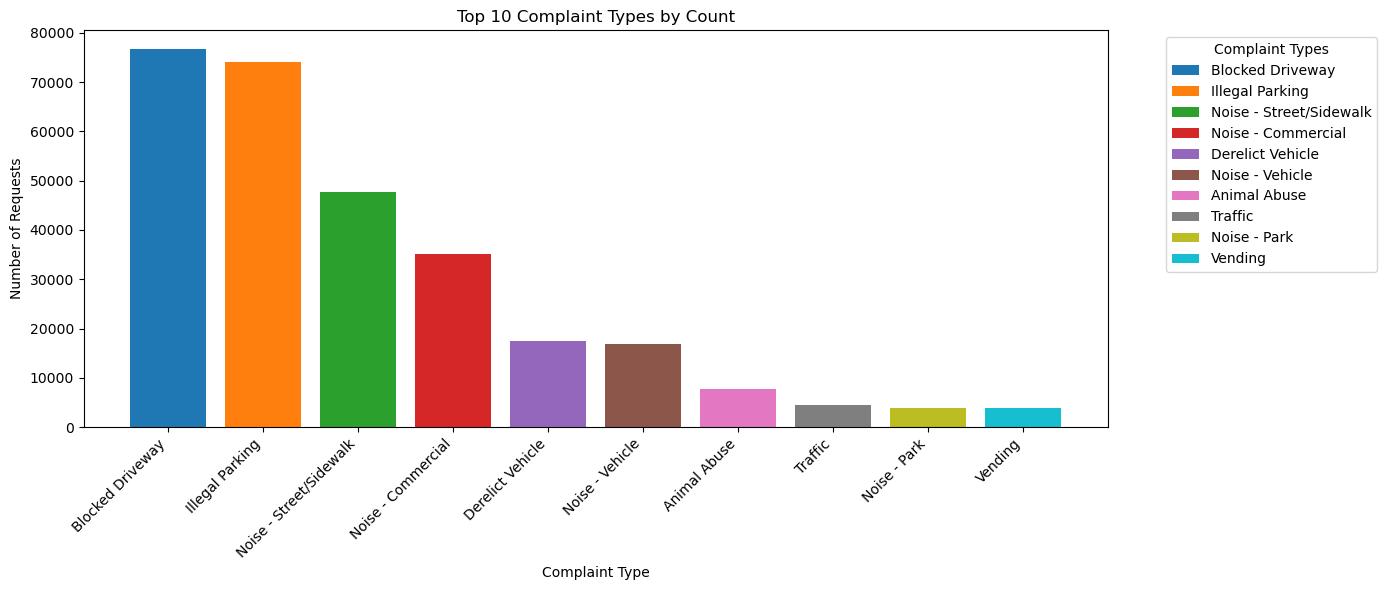

In [48]:
# Get the top 10 most common complaint types
top_ten_complaints = df_cleaned['Complaint Type'].value_counts().nlargest(10)

# Plotting figure and color
plt.figure(figsize=(14, 6))
colors = plt.cm.tab10(range(len(top_ten_complaints)))  

# Plot bars 
bars = plt.bar(top_ten_complaints.index, top_ten_complaints.values, color=colors)

# Add legend 
plt.legend(bars, top_ten_complaints.index, title="Complaint Types", 
           bbox_to_anchor=(1.05, 1), loc='upper left') 

# Add title and labels
plt.title('Top 10 Complaint Types by Count')
plt.xlabel('Complaint Type')
plt.ylabel('Number of Requests')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()  
plt.show()

The data reveals that blocked driveways and illegal parking were the most frequent complaints followed by noise-related issues, highlighting persistent challenges with parking violations and public disturbances in the city.

#### Insight 2: Distribution of Request Closing Time

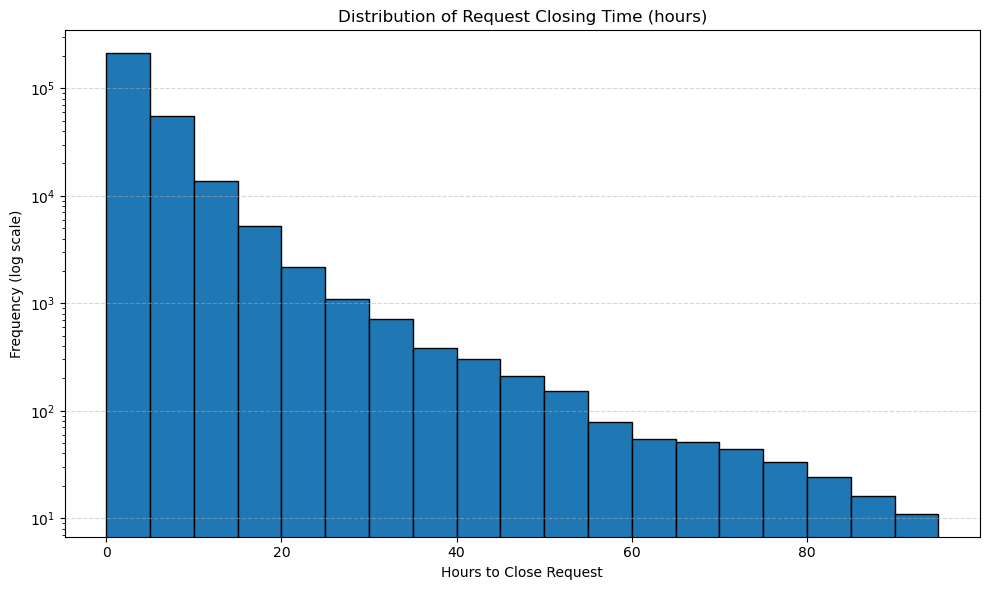

In [51]:
# bins for the histogram in 5-hour intervals from 0 to 100 hours
bins = np.arange(0, 100, 5)

# Plot the histogram 
plt.figure(figsize=(10, 6))
plt.hist(df_cleaned['Request Closing Time'], bins=bins, edgecolor='black')  

# Set y-axis to logarithmic scale
plt.yscale('log')  

# Add title and axis labels
plt.title('Distribution of Request Closing Time (hours)')
plt.xlabel('Hours to Close Request')
plt.ylabel('Frequency (log scale)')  

#  Add grid lines
plt.grid(axis='y', alpha=0.5, linestyle='--')

plt.tight_layout()
plt.show()

The chart shows that most requests are resolved within a short time, with a sharp decline in frequency as closing time increases. This indicates that the majority of issues are addressed quickly, while only a few take significantly longer to resolve.

#### Insight 3: Monthly trend of total service requests

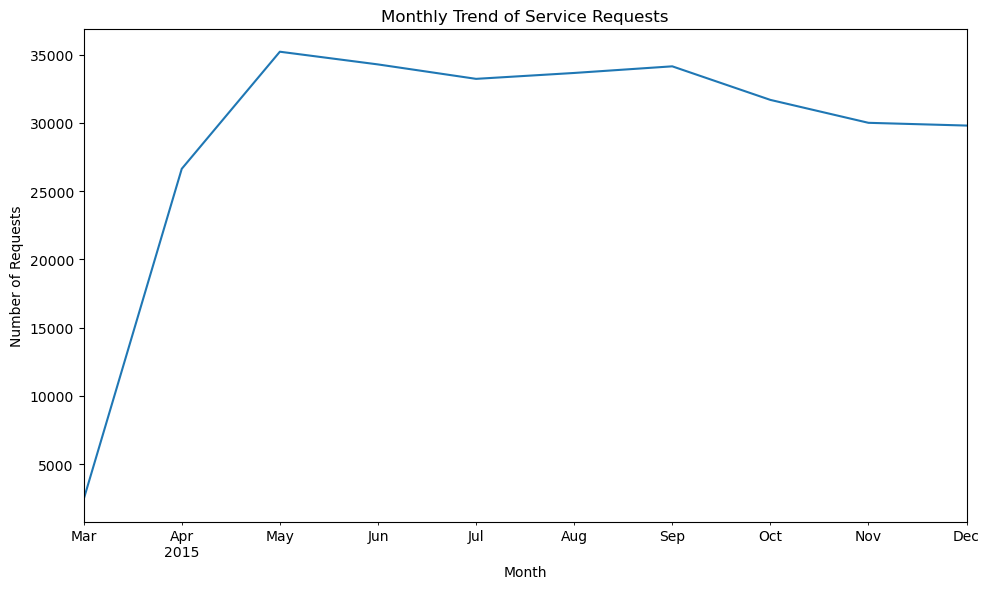

In [54]:
# Resample the data to get the number of service requests per month
monthly = df_cleaned.set_index('Created Date').resample('ME').size() 

# Plot the monthly trend as a line chart
plt.figure(figsize=(10,6))
monthly.plot()

# Add title and axis labels 
plt.title('Monthly Trend of Service Requests')
plt.xlabel('Month')
plt.ylabel('Number of Requests')


plt.tight_layout()
plt.show()

The trend of Service requests peaked in May 2015, indicating a surge in demand during late spring. Afterward, the number of requests steadily declined, suggesting reduced service activity in the latter half of the year.

#### Insight 4: Average closing time by complaint type (top 10)

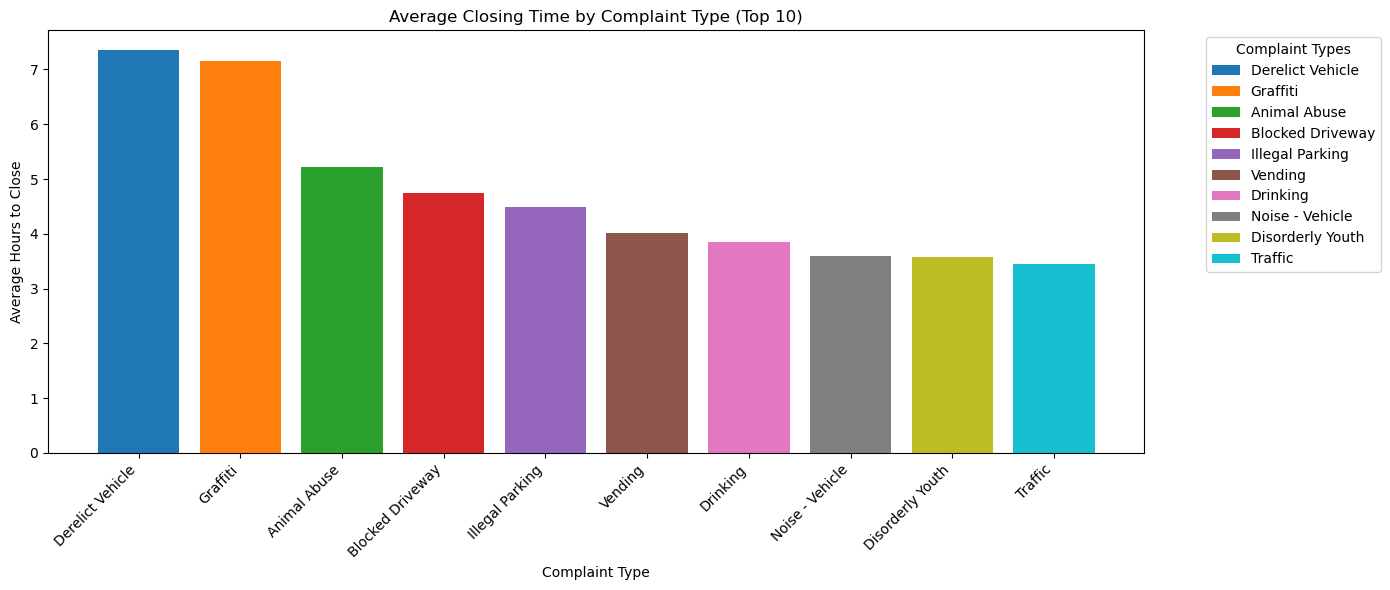

In [57]:
# Calculate the average request closing time per complaint type
# Select the top 10 complaint types with the average closing time
avg_time = df_cleaned.groupby('Complaint Type')['Request Closing Time'].mean().nlargest(10)

# Plot a bar chart with distinct colors and a legend
plt.figure(figsize=(14, 6))

# colormap with 10 distinct colors
colors = plt.cm.tab10(range(len(avg_time)))

# Plot bars
bars = plt.bar(avg_time.index, avg_time.values, color=colors)

# title and axis labels
plt.title('Average Closing Time by Complaint Type (Top 10)')
plt.xlabel('Complaint Type')
plt.ylabel('Average Hours to Close')
plt.xticks(rotation=45, ha='right')

#  legend 
plt.legend(bars, avg_time.index, title='Complaint Types', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

The above graph shows that Derelict Vehicle and Graffiti complaints take the longest to resolve, averaging over 7 hours, while Traffic complaints are resolved the fastest at around 3.5 hours. Most other top complaint types fall within a moderate resolution time of 3.5 to 5.3 hours.










### 3.2 Arrange the Complaint Types by Average Request Closing Time, Categorized by Various Locations

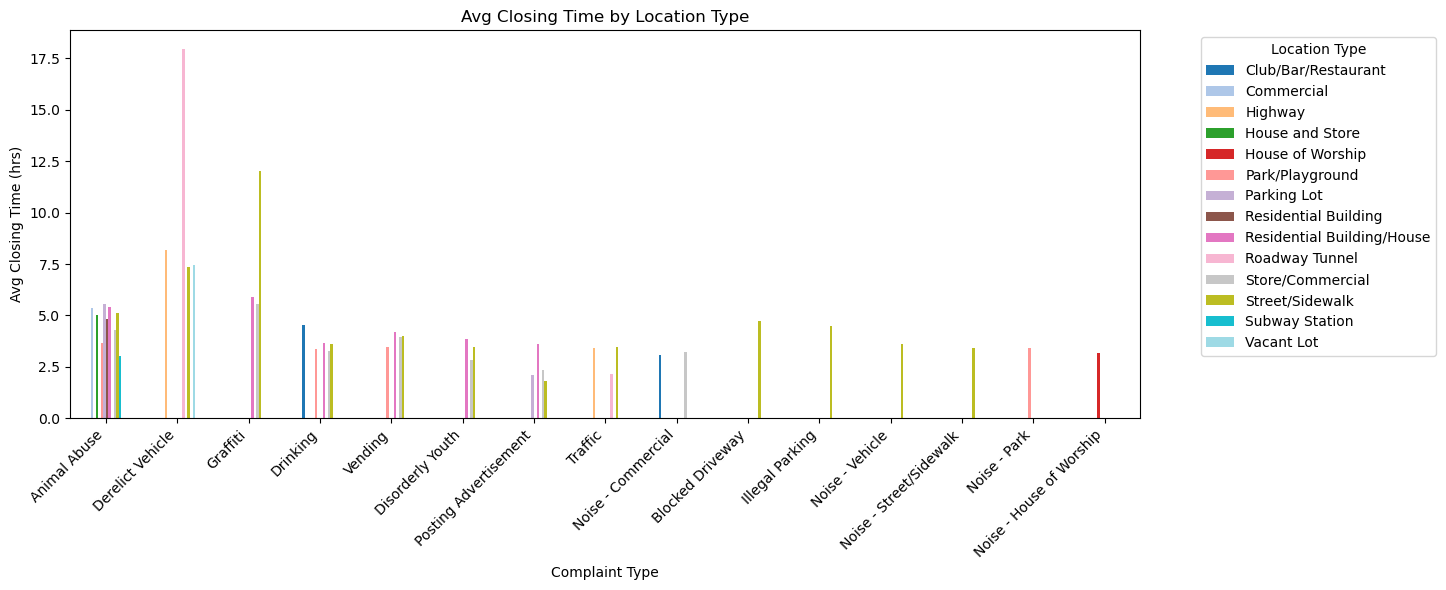

In [60]:
#  Compute averages
grouped = (
    df_cleaned
    .groupby(['Complaint Type','Location Type'])['Request Closing Time']
    .mean()
    .unstack(fill_value=0)       
)

# Sort complaint types by their overall average closing time (across all location types)
data = grouped.loc[grouped.mean(axis=1).sort_values(ascending=False).index]


#  Plot
colors = plt.get_cmap('tab20', len(data.columns))
ax = data.plot(kind='bar', figsize=(12,6), color=[colors(i) for i in range(len(data.columns))])

# Set y-axis label and chart title
ax.set_ylabel('Avg Closing Time (hrs)')
ax.set_title('Avg Closing Time by Location Type')

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Place legend outside the plot 
plt.legend(title='Location Type', bbox_to_anchor=(1.05,1))
plt.tight_layout()
plt.show()


The above graph shows that average time to close complaints not only varies by complaint type but also significantly depends on the location type. Complaints like Derelict Vehicle and Graffiti show notably higher closing times in specific areas such as Roadway Tunnels and Highways. In contrast, more common complaints like Traffic and Noise - Vehicle tend to be resolved more quickly and show less variation across locations. This suggests that the complexity or accessibility of certain locations may influence service efficiency.

# 4. Statistical Testing

## Test 1: Whether the average response time across complaint types is similar or not.

In [64]:
# H0: Average response times are the same across complaint types
# H1: At least one group has a different average response time

In [65]:
from scipy.stats import f_oneway

In [66]:
# Grouping the 'Request Closing Time' values by each unique 'Complaint Type'
grouped_data = [group['Request Closing Time'].values 
                for name, group in df_cleaned.groupby('Complaint Type')]

f_stat, p_value = f_oneway(*grouped_data)

print("F-Test (ANOVA):")
print("F-statistic:", f_stat)
print("P-value:", p_value)

if p_value < 0.05:
    print("Reject H0: Complaint types differ in average response time.")
else:
    print("Fail to reject H0: No significant difference in response time across types.")


F-Test (ANOVA):
F-statistic: 578.9120337398356
P-value: 0.0
Reject H0: Complaint types differ in average response time.


## Test 2: Whether the type of complaint or service requested and location are related.

In [68]:
# H0: Complaint type and location type are independent
# H1: Complaint type and location are dependent

In [69]:
from scipy.stats import chi2_contingency

In [70]:
# Contingency table
contingency = pd.crosstab(df_cleaned['Complaint Type'], df_cleaned['Location Type'])

# Chi-Square Test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency)

print("Chi-Square Test - Chi2 Statistic:", chi2_stat)
print("P-value:", p_value)

if p_value < 0.05:
    print("Reject H0: Complaint type and location are related.")
else:
    print("Fail to reject H0: No significant relationship found.")

Chi-Square Test - Chi2 Statistic: 1049203.872020897
P-value: 0.0
Reject H0: Complaint type and location are related.
